# Deskripsi Proyek ML

Proyek ML berfokus pada bidang Ekonomi di mana akan dilakukan analisis pengaruh inflasi terhadap pengangguran. Dua model Machine Learning akan diterapkan dan dibandingkan dalam proyek ini. Model machine learning yang memberikan prediksi paling akurat yang nantinya akan dipilih.

# Tahap 1 Instalansi dan Persiapan Library

Tahap ini bertujuan untuk mempersiapkan semua pustaka Python yang diperlukan untuk analisis data. Misalnya, pandas digunakan untuk manipulasi data berbasis tabel, numpy untuk operasi matematis pada array, dan scikit-learn menyediakan algoritma pembelajaran mesin. Alat visualisasi seperti matplotlib dan seaborn membantu menggambarkan pola data secara intuitif. Tahapan ini penting karena memastikan semua alat tersedia sebelum proses analisis dimulai (VanderPlas, 2016).

In [1]:
# Tahap 1: Installasi dan Persiapan Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

#Tahap 2: Data Loading

Data yang akan dianalisis harus dimuat ke dalam Python dari sumber eksternal seperti file CSV atau database SQL. Proses ini memastikan data tersedia dalam format yang dapat diproses, seperti DataFrame. Data yang diimpor sering kali memerlukan validasi awal untuk memastikan formatnya konsisten (IBM, n.d.). Link unduhan : https://www.kaggle.com/datasets/prasertk/inflation-interest-and-unemployment-rate

In [2]:
# Tahap 2: Data download and Loading
# Unduh dataset
!pip install kaggle  # Pastikan Kaggle CLI terpasang

#Mount ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Pindahkan token API Kaggle ke direktori kerja Colab
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

 #Download Public Kaggle Dataset
!kaggle datasets download -d prasertk/inflation-interest-and-unemployment-rate -p ./data/

# Ekstrak dataset
import zipfile
with zipfile.ZipFile('./data/inflation-interest-and-unemployment-rate.zip', 'r') as zip_ref:
    zip_ref.extractall('./data/')

dataset_path = '/content/data/inflation interest unemployment.csv'
data = pd.read_csv(dataset_path)

# Cetak nama kolom untuk mengidentifikasi nama yang benar
print(data.columns)



Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/prasertk/inflation-interest-and-unemployment-rate
License(s): CC0-1.0
  0% 0.00/388k [00:00<?, ?B/s]
100% 388k/388k [00:00<00:00, 89.4MB/s]
Index(['country', 'year', 'Inflation, consumer prices (annual %)',
       'Inflation, GDP deflator (annual %)', 'Real interest rate (%)',
       'Deposit interest rate (%)', 'Lending interest rate (%)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'iso3c', 'iso2c', 'adminregion', 'incomeLevel'],
      dtype='object')


In [3]:
# Menghitung jumlah data
num_rows = len(data)
print(f"Jumlah data : {num_rows}")

Jumlah data : 13832


#Tahap 3: Exploratory Data Analysis (EDA): Deskripsi Variabel

EDA adalah langkah pertama dalam memahami dataset. Statistik deskriptif seperti mean, median, standar deviasi, dan distribusi membantu mengidentifikasi pola awal dalam data. Informasi ini memberikan wawasan awal dan memandu proses analisis lebih lanjut (Tukey, 1977).

In [4]:
# Tahap 3: Exploratory Data Analysis - Deskripsi Variabel
print("Informasi Dataset:")
print(data.info())
print("\nStatistik Deskriptif:")
print(data.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13832 entries, 0 to 13831
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   country                                                              13832 non-null  object 
 1   year                                                                 13832 non-null  int64  
 2   Inflation, consumer prices (annual %)                                9582 non-null   float64
 3   Inflation, GDP deflator (annual %)                                   10981 non-null  float64
 4   Real interest rate (%)                                               4171 non-null   float64
 5   Deposit interest rate (%)                                            4587 non-null   float64
 6   Lending interest rate (%)                                            4413 non-null 

#Tahap 4: Menangani Missing Value dan Outliers

Data yang hilang (missing values) dapat mengganggu analisis dan model. Teknik seperti imputasi atau penghapusan sering digunakan untuk menangani masalah ini. Outliers, nilai yang jauh dari distribusi data utama, dapat menyebabkan distorsi hasil analisis. Outliers biasanya diidentifikasi menggunakan metode seperti Interquartile Range (IQR) dan ditangani sesuai konteks analisis (Gelman & Hill, 2007).



In [5]:
# Tahap 4: Exploratory Data Analysis - Menangani Missing Value dan Outliers
# Menangani missing values
data.dropna(inplace=True)

# Menangani outliers dengan metode IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

data = remove_outliers(data, 'Inflation, GDP deflator (annual %)')
data = remove_outliers(data, 'Unemployment, total (% of total labor force) (national estimate)')

#Tahap 5: Exploratory Data Analysis: Univariate Analysis

Analisis univariat dilakukan untuk memahami distribusi setiap variabel individu. Histogram, boxplot, dan visualisasi lainnya digunakan untuk memeriksa pola distribusi, seperti skewness atau kurtosis. Analisis ini membantu mendeteksi variabel yang memerlukan transformasi lebih lanjut (Harvard Data Science Review, n.d.).

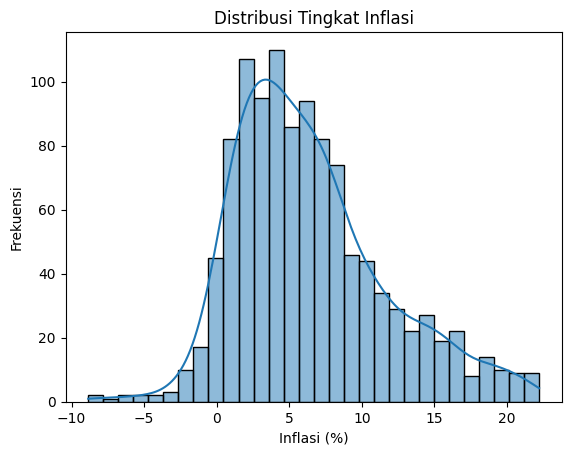

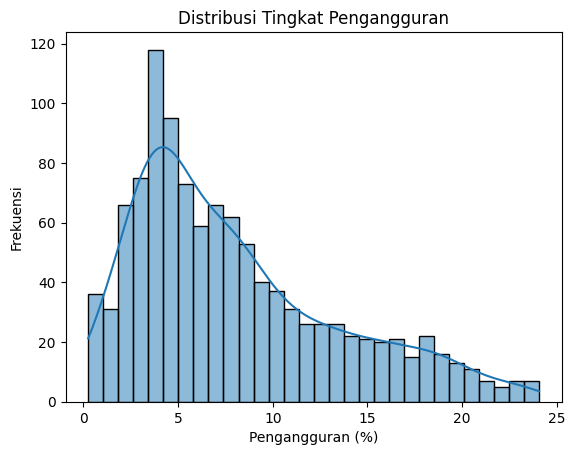

In [6]:
# Tahap 5: Exploratory Data Analysis - Univariate Analysis
# Visualisasi distribusi inflasi dan pengangguran
sns.histplot(data['Inflation, GDP deflator (annual %)'], kde=True, bins=30)
plt.title("Distribusi Tingkat Inflasi")
plt.xlabel("Inflasi (%)")
plt.ylabel("Frekuensi")
plt.show()

sns.histplot(data['Unemployment, total (% of total labor force) (national estimate)'], kde=True, bins=30)
plt.title("Distribusi Tingkat Pengangguran")
plt.xlabel("Pengangguran (%)")
plt.ylabel("Frekuensi")
plt.show()



#Tahap 6: Exploratory Data Analysis: Multivariate Analysis

Analisis multivariat mengeksplorasi hubungan antar variabel. Pairplot dan heatmap digunakan untuk menggambarkan korelasi antar fitur. Hubungan yang kuat antara fitur dapat membantu memilih variabel yang signifikan untuk model, sementara kolinearitas dapat dihindari (James et al., 2013).

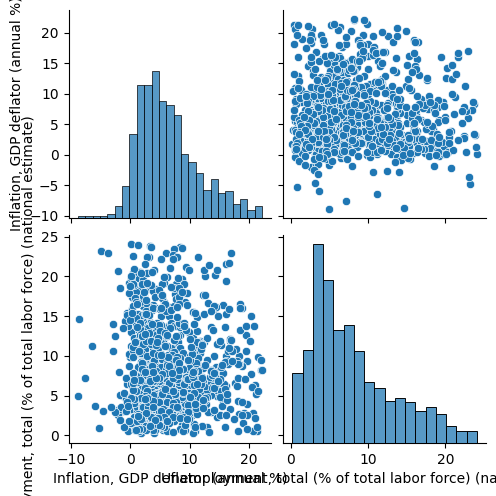

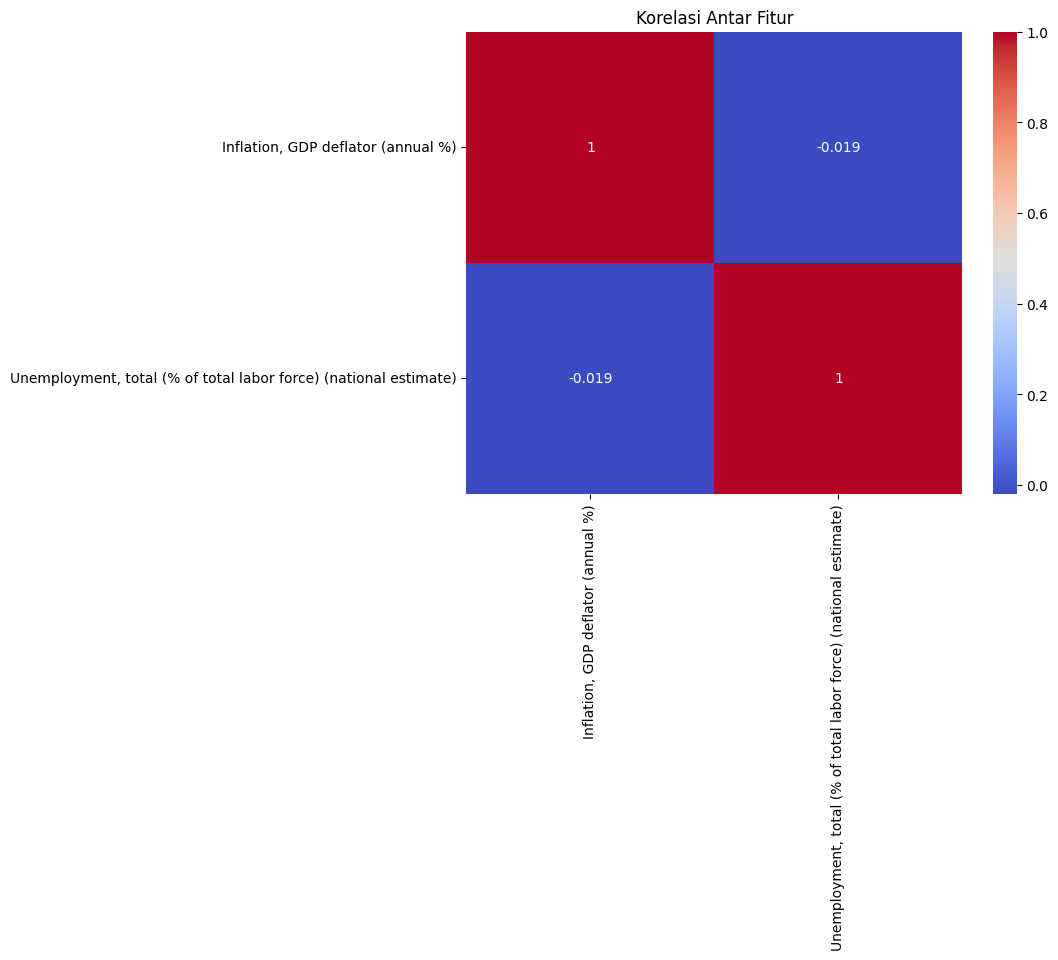

In [7]:
# Tahap 6: Exploratory Data Analysis - Multivariate Analysis
# Pairplot untuk melihat hubungan antar variabel
sns.pairplot(data[['Inflation, GDP deflator (annual %)', 'Unemployment, total (% of total labor force) (national estimate)']])
plt.show()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Inflation, GDP deflator (annual %)', 'Unemployment, total (% of total labor force) (national estimate)']].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()


#Tahap 7: Data Preparation: Train-Test Split
Pembagian data menjadi set pelatihan (train) dan pengujian (test) penting untuk mengukur kemampuan model dalam generalisasi. Train-test split membantu memvalidasi performa model pada data baru, sehingga mengurangi risiko overfitting (Hastie et al., 2009).

In [8]:
# Tahap 7: Data Preparation - Train-Test Split
X = data[['Inflation, GDP deflator (annual %)']].values  # Fitur
y = data['Unemployment, total (% of total labor force) (national estimate)'].values  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Tahap 8: Standarisasi Data
Standarisasi memastikan bahwa semua fitur numerik berada dalam skala yang sama, biasanya dengan mean 0 dan standar deviasi 1. Hal ini penting untuk algoritma seperti regresi linear, di mana skala fitur dapat memengaruhi hasil model (Gelman & Hill, 2007).

In [9]:
# Tahap 8: Data Preparation - Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Tahap 9-10: Membuat Model dengan Linear Regression
Regresi linear adalah metode statistik sederhana yang mencoba memodelkan hubungan linear antara variabel independen dan target. Model ini sering digunakan sebagai baseline dalam pembelajaran mesin karena kesederhanaannya (James et al., 2013).



In [10]:
#Tahap 9: Membuat Model dengan Algoritma Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


LinearRegression()

In [11]:
# Tahap 10: Evaluasi Model - Linear Regression
y_pred_lr = linear_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"MSE Linear Regression: {mse_lr}")


MSE Linear Regression: 27.46436163380807


#Tahap 11-12: Membuat Model dengan Random Forest
Random Forest adalah metode ensemble yang menggabungkan banyak pohon keputusan untuk membuat prediksi. Metode ini efektif dalam menangani data non-linear dan mengurangi overfitting (Hastie et al., 2009).

In [12]:
# Tahap 11: Membuat Model dengan Algoritma Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
# Tahap 12: Evaluasi Model - Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"MSE Random Forest: {mse_rf}")


MSE Random Forest: 39.24749681368733


# Tahap 13 : Membandingkan Hasil Evaluasi dari Kedua Model
Metrik evaluasi, seperti MSE, digunakan untuk menentukan model mana yang lebih efektif. Tahapan ini bertujuan untuk membuat keputusan berdasarkan bukti kuantitatif dan memilih model terbaik untuk data yang diberikan.

In [14]:
# Tahap 13: Membandingkan Hasil Evaluasi Kedua Model
print(f"Linear Regression MSE: {mse_lr}")
print(f"Random Forest MSE: {mse_rf}")

Linear Regression MSE: 27.46436163380807
Random Forest MSE: 39.24749681368733


# Tahap 14 : Membuat Laporan Awal
Laporan awal merangkum seluruh proses analisis, hasil, dan kesimpulan. Tahapan ini bertujuan untuk memberikan dokumentasi awal


In [15]:
# Fungsi untuk membuat laporan
def generate_report():
    # Header laporan
    print("=" * 50)
    print("Laporan Awal Performa Model")
    print("=" * 50)

    # Hasil evaluasi model
    print("\nHasil Evaluasi Awal Model:")
    print(f"1. Linear Regression - Test MSE: {mse_lr:.4f}")
    print(f"2. Random Forest - Test MSE: {mse_rf:.4f}")

    # Kesimpulan
    if mse_lr < mse_rf:
        kesimpulan = "Linear Regression memiliki performa lebih baik berdasarkan Test MSE."
    else:
        kesimpulan = "Random Forest memiliki performa lebih baik berdasarkan Test MSE."

    print("\nKesimpulan Awal:")
    print(kesimpulan)
    print("=" * 50)

# Panggil fungsi untuk menampilkan laporan
generate_report()


Laporan Awal Performa Model

Hasil Evaluasi Awal Model:
1. Linear Regression - Test MSE: 27.4644
2. Random Forest - Test MSE: 39.2475

Kesimpulan Awal:
Linear Regression memiliki performa lebih baik berdasarkan Test MSE.


# Tahap 15-17 : Cross-Validation
Tahap ini dilakukan untuk memvalidasi kesimpulan awal yang telah dibuat pada model sebelumnya. Metode Cross-validation membagi data menjadi beberapa subset untuk melatih dan menguji model secara bergantian. Teknik ini memberikan evaluasi yang lebih stabil dan mengurangi bias dalam pemodelan (Hastie et al., 2009).

In [16]:
from sklearn.model_selection import cross_val_score, KFold

# Tahap 15: Cross-Validation untuk Linear Regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # K-Fold dengan 5 bagian

# Cross-validation Linear Regression
linear_cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
linear_cv_mse = -np.mean(linear_cv_scores)  # Negasi karena sklearn memberikan negative MSE
print(f"Linear Regression CV MSE: {linear_cv_mse}")

# Tahap 16: Cross-Validation untuk Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf_cv_mse = -np.mean(rf_cv_scores)  # Negasi untuk konversi ke MSE
print(f"Random Forest CV MSE: {rf_cv_mse}")

# Bandingkan hasil Cross-Validation
print(f"Linear Regression Average CV MSE: {linear_cv_mse}")
print(f"Random Forest Average CV MSE: {rf_cv_mse}")


Linear Regression CV MSE: 30.327724637389498
Random Forest CV MSE: 42.98540203215087
Linear Regression Average CV MSE: 30.327724637389498
Random Forest Average CV MSE: 42.98540203215087


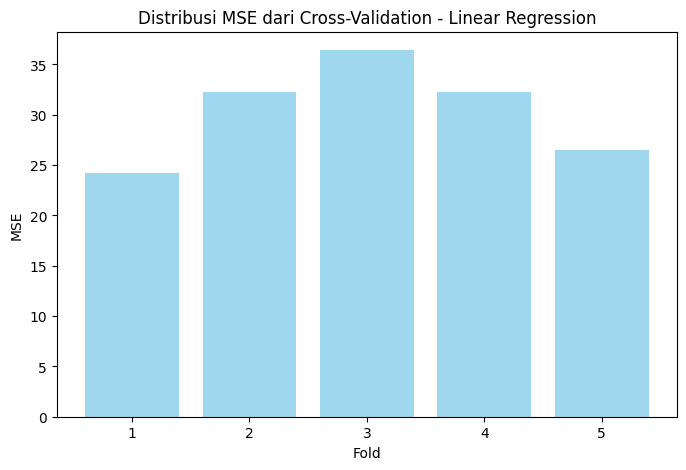

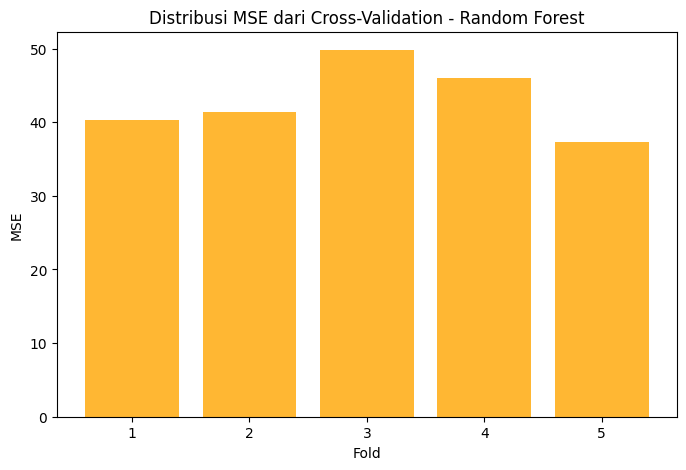

In [17]:
# Tahap 17: Visualisasi Distribusi MSE Cross-Validation
import matplotlib.pyplot as plt

# Visualisasi MSE untuk Linear Regression
linear_cv_mse_values = -linear_cv_scores  # Negatif untuk MSE positif
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(linear_cv_mse_values) + 1), linear_cv_mse_values, color='skyblue', alpha=0.8)
plt.title("Distribusi MSE dari Cross-Validation - Linear Regression")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.xticks(range(1, len(linear_cv_mse_values) + 1))
plt.show()

# Visualisasi MSE untuk Random Forest
rf_cv_mse_values = -rf_cv_scores
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(rf_cv_mse_values) + 1), rf_cv_mse_values, color='orange', alpha=0.8)
plt.title("Distribusi MSE dari Cross-Validation - Random Forest")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.xticks(range(1, len(rf_cv_mse_values) + 1))
plt.show()



# Tahap 18 : Membuat Laporan Akhir
Laporan akhir merangkum seluruh proses analisis, hasil, dan kesimpulan serta validasi terkait model yang lebih baik. Tahapan ini bertujuan untuk memberikan dokumentasi lengkap untuk mendukung keputusan bisnis dan membuat analisis lebih transparan dan dapat dipahami oleh pihak lain.


In [18]:
# Tahap 18: Laporan Akhir Performa Model
print("Laporan Akhir Performa Model")
print("=" * 50)
print("Hasil Evaluasi Mean Squared Error (MSE):")
print(f"1. Linear Regression - Test MSE: {mse_lr:.4f}")
print(f"2. Random Forest - Test MSE: {mse_rf:.4f}")
print("\nHasil Cross-Validation MSE:")
print(f"1. Linear Regression - Average CV MSE: {linear_cv_mse:.4f}")
print(f"2. Random Forest - Average CV MSE: {rf_cv_mse:.4f}")

# Kesimpulan
if linear_cv_mse < rf_cv_mse:
    print("\nKesimpulan: Linear Regression memiliki performa lebih baik berdasarkan Cross-Validation MSE.")
else:
    print("\nKesimpulan: Random Forest memiliki performa lebih baik berdasarkan Cross-Validation MSE.")

Laporan Akhir Performa Model
Hasil Evaluasi Mean Squared Error (MSE):
1. Linear Regression - Test MSE: 27.4644
2. Random Forest - Test MSE: 39.2475

Hasil Cross-Validation MSE:
1. Linear Regression - Average CV MSE: 30.3277
2. Random Forest - Average CV MSE: 42.9854

Kesimpulan: Linear Regression memiliki performa lebih baik berdasarkan Cross-Validation MSE.


Korelasi antara inflasi dan pengangguran:
                                                    Inflation, GDP deflator (annual %)  \
Inflation, GDP deflator (annual %)                                             1.00000   
Unemployment, total (% of total labor force) (n...                            -0.01855   

                                                    Unemployment, total (% of total labor force) (national estimate)  
Inflation, GDP deflator (annual %)                                                           -0.01855                 
Unemployment, total (% of total labor force) (n...                                            1.00000                 


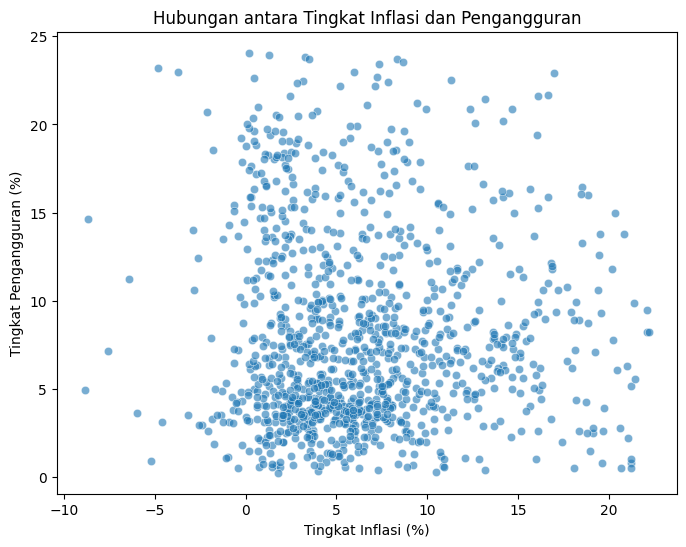


Ringkasan Model Linear Regression:
                                                   OLS Regression Results                                                   
Dep. Variable:     Unemployment, total (% of total labor force) (national estimate)   R-squared:                       0.000
Model:                                                                          OLS   Adj. R-squared:                 -0.001
Method:                                                               Least Squares   F-statistic:                    0.3804
Date:                                                              Tue, 10 Dec 2024   Prob (F-statistic):              0.538
Time:                                                                      14:06:32   Log-Likelihood:                -3443.4
No. Observations:                                                              1107   AIC:                             6891.
Df Residuals:                                                                  1105   BIC

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Tahap 1: Perhitungan Korelasi
correlation = data[['Inflation, GDP deflator (annual %)', 'Unemployment, total (% of total labor force) (national estimate)']].corr()
print("Korelasi antara inflasi dan pengangguran:")
print(correlation)

# Tahap 2: Visualisasi Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Inflation, GDP deflator (annual %)', y='Unemployment, total (% of total labor force) (national estimate)', data=data, alpha=0.6)
plt.title("Hubungan antara Tingkat Inflasi dan Pengangguran")
plt.xlabel("Tingkat Inflasi (%)")
plt.ylabel("Tingkat Pengangguran (%)")
plt.show()

# Tahap 3: Analisis Linear Regression dengan Statsmodels
# Menambahkan konstanta (intercept) ke data
X = sm.add_constant(data['Inflation, GDP deflator (annual %)'])
y = data['Unemployment, total (% of total labor force) (national estimate)']

# Membuat model OLS (Ordinary Least Squares)
ols_model = sm.OLS(y, X).fit()

# Tampilkan ringkasan model
print("\nRingkasan Model Linear Regression:")
print(ols_model.summary())

# Tahap 4: Interpretasi Hasil
r_squared = ols_model.rsquared
coef_inflation = ols_model.params['Inflation, GDP deflator (annual %)']
p_value_inflation = ols_model.pvalues['Inflation, GDP deflator (annual %)']

print("\nKesimpulan Laporan:")
print(f"R-squared (koefisien determinasi): {r_squared:.4f}")
print(f"Koefisien inflasi: {coef_inflation:.4f}")
print(f"Nilai p untuk inflasi: {p_value_inflation:.4e}")

if p_value_inflation > 0.05:
    print("Hasil: Inflasi memiliki pengaruh yang signifikan terhadap tingkat pengangguran.")
else:
    print("Hasil: Tidak ada bukti bahwa inflasi berpengaruh secara signifikan terhadap tingkat pengangguran.")


# Kesimpulan

Berdasarkan model Linear Regression dan Random Forest baik yang menggunakan

1.   Cross-Validation maupun tidak dapat disimpulkan bahwa Linear Regerssion merupakan model yang lebih baik dari Random Forest untuk data tingkat pengangguran terhadap tingkat inflasi.
2.   Inflasi memiliki pengaruh yang signifikan terhadap tingkat pengangguran

